In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [3]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)#since the data was in the format of dictonary we can use the keys to allocate the values to the dataframe
df['target'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
X,y = dataset.data, dataset.target
X,y
X.shape,y.shape

((20640, 8), (20640,))

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [8]:
#converting the array to the tensor. .float helps to keep all the tensors in the same datatype
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().unsqueeze(1)
y_test = torch.tensor(y_test).float().unsqueeze(1)
#.float is to make sure all the data is in the same format and unsqeeze is to get the tensor in the required shape 
#that is compatible for the libraries that we use in the model
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([16512, 8]),
 torch.Size([4128, 8]),
 torch.Size([16512, 1]),
 torch.Size([4128, 1]))

In [9]:
#normalizing the data, which helps to make the predictions better
mean = X_train.mean(dim=0)#dim = 0 means calculate the mean across the row, and 1 means calculate across columns
std = X_train.std(dim=0)
X_train = (X_train-mean)/std #each value in the tensor will be subtracted with the mean and divided by standard deviation
X_test = (X_test-mean)/std
X_train.shape, X_test.shape

(torch.Size([16512, 8]), torch.Size([4128, 8]))

### Linear Regression Model

In [10]:
class Linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        #super is used to call the parent class in the child class, in our case nn.module is th eparent class, so since we are calling this class in the child calss we are creating.
        super().__init__() 
        #we build the layers now
        #input layer --> hidden layer --> output layer
        self.fc1 = nn.Linear(8,128,bias = True)#this is the hidden layer, the default value is ture anyways but this is for our understanding
        self.out = nn.Linear(128,1,bias = True) #output layer
        self.relu = nn.ReLU()#defineing the activation function

    #the init function was used to initialize the layers, the forward function is used to use the created layers in action

    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.out(x)

        return x



In [11]:
X_train.shape[1]

8

In [12]:
model = Linear_regression(input_size=X_train.shape[1],output_size=1)#outputsize is 1 because we need to predict only 1 value

In [13]:
#we have to create a loss function which helps during backpropagation
#import torch.optim as optim, this hiw we use optim
criterion = nn.MSELoss() #meansquarederror, nn.L1loss is used for mean absolute error
optimizer = optim.SGD(model.parameters(),lr = 0.01)#we have initialized our model in the previous cell, so those parameters will be called in this line


### Training

In [14]:
num_epochs = 20000
losses = []
for epoch in range(num_epochs):
    #we initialize both the forward pass and backward pass,
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)#it calculates the loss between the predicted values and the actual values

    #backward pass
    #the first step is to set the zero gradient
    optimizer.zero_grad()#this line states that the, gradient is set to zero after every epoch so that the network doesnt remember the weights that it trained on that epoch 
    loss.backward()
    optimizer.step()#it is used to update the parameters using the gradient


    if (epoch+1)%1000 == 0:
        #printing the loss for every 100 epochs
        print(f'Epoch: {(epoch+1)}/{num_epochs}, loss: {loss.item(): .4f}')

    losses.append(loss.item())

Epoch: 1000/20000, loss:  0.4410
Epoch: 2000/20000, loss:  0.4021
Epoch: 3000/20000, loss:  0.3821
Epoch: 4000/20000, loss:  0.3689
Epoch: 5000/20000, loss:  0.3577
Epoch: 6000/20000, loss:  0.3492
Epoch: 7000/20000, loss:  0.3423
Epoch: 8000/20000, loss:  0.3360
Epoch: 9000/20000, loss:  0.3303
Epoch: 10000/20000, loss:  0.3252
Epoch: 11000/20000, loss:  0.3206
Epoch: 12000/20000, loss:  0.3164
Epoch: 13000/20000, loss:  0.3128
Epoch: 14000/20000, loss:  0.3096
Epoch: 15000/20000, loss:  0.3066
Epoch: 16000/20000, loss:  0.3039
Epoch: 17000/20000, loss:  0.3015
Epoch: 18000/20000, loss:  0.2992
Epoch: 19000/20000, loss:  0.2971
Epoch: 20000/20000, loss:  0.2951


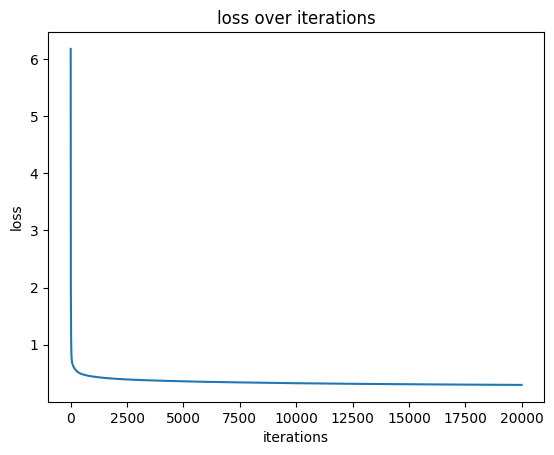

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(num_epochs),losses)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('loss over iterations')
plt.show()

### Testing

In [16]:
with torch.no_grad():#It means any tensor with gradient currently attached with the current computational graph is now detached from the current graph.
    y_test_pred = model(X_test)
    test_loss = criterion(y_test_pred,y_test)
    print(f'total loss : {test_loss.item(): .4f}')

total loss :  0.3091


In [17]:
mae = torch.abs(y_test_pred-y_test).mean()
print("mean absoulute error: ",mae.item())

mean absoulute error:  0.3886340856552124


In [18]:
def mean_absolute_precentage_error(y_true, y_prediction):
    return 100*torch.mean(torch.abs((y_true - y_prediction)/y_true))

mape = mean_absolute_precentage_error(y_test,y_test_pred)
print(mape)

tensor(21.9651)


In [23]:
ss =range(100)
ss

range(0, 100)

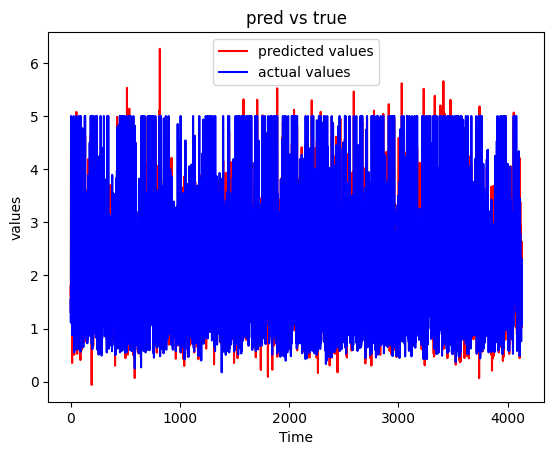

In [24]:
plt.plot(y_test_pred, color = 'red', label = 'predicted values')
plt.plot(y_test, color = 'blue', label = 'actual values')
plt.title('pred vs true')
plt.xlabel('Time')
plt.ylabel('values')
plt.legend()
plt.show()